In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data = {}
work = {}
aux = {}
experiments = ["step_1", "step_2", "step_3_1", "step_3_2"]

constants = ll.read_csv("constants.csv")

for e in experiments:
    data[e] = ll.read_csv("measurements/%s.csv" % e)
    work[e] = ll.varlist()
    ll.add(work[e],
           constants,
           ll.read_csv("constants/%s.csv" % e))
    aux[e] = {}

#for e in experiments:
#    disp("Data for experiment %s:" % e, data[e])
#    
#for e in experiments:
#    disp("Constants for experiment %s:" % e, work[e])

In [3]:
for e in experiments:
    disp("Data for %s (d = %f ± %f):" % (e, work[e].Value["d"], work[e].Error["d"]))
    
    ll.compute("P",
               lambda P_m, P_angle, P_coef: P_m * P_angle * P_coef,
               work[e],
               data[e])
    
    ll.compute("Q",
               lambda V, t: V / t,
               work[e],
               data[e])
    
    ll.compute("L",
               lambda L_1, L_2: L_2 - L_1,
               work[e],
               data[e],
               { "L_1": { "Error": "Error_L" },
                 "L_2": { "Error": "Error_L" } })

    disp(work[e], data[e])

'Data for step_1 (d = 0.003575 ± 0.000025):'

,Value,Error
P_coef,9.806650,0.000005
P_angle,0.200000,0.010000
d,0.003575,0.000025
L_1,0.409000,0.000500
L_2,0.809000,0.000500
L,0.400000,0.000707


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,10,0.5,1,0.05,68,1,19.61330,1.386870,0.014706,0.000766
1,20,0.5,2,0.05,68,1,39.22660,2.192834,0.029412,0.000853
2,30,0.5,3,0.05,70,1,58.83990,3.101135,0.042857,0.000941
3,40,0.5,4,0.05,73,1,78.45320,4.043385,0.054795,0.001016
4,50,0.5,5,0.05,77,1,98.06650,5.000430,0.064935,0.001064
5,60,0.5,6,0.10,81,1,117.67980,5.965152,0.074074,0.001536
6,70,1.0,7,0.10,87,1,137.29310,7.139349,0.080460,0.001475
7,80,1.0,8,0.10,95,1,156.90640,8.086771,0.084211,0.001376
8,90,1.0,9,0.10,100,1,176.51970,9.041285,0.090000,0.001345
9,100,1.0,10,0.10,104,1,196.13300,10.000860,0.096154,0.001334


'Data for step_2 (d = 0.003575 ± 0.000025):'

,Value,Error
P_coef,9.806650,0.000005
P_angle,0.200000,0.010000
V,5.000000,0.050000
t,72.000000,1.000000
d,0.003575,0.000025
Q,0.069444,0.001188


,L_1,L_2,Error_L,P_m,Error_P_m,P,Error_P,L
0,0,0.109,0.000707,37,0.05,72.56921,3.629785,0.109
1,0,0.409,0.000707,78,0.05,152.98374,7.649816,0.409
2,0,0.709,0.000707,135,0.05,264.77955,13.239341,0.709
3,0,1.209,0.000707,197,0.05,386.38201,19.319349,1.209


'Data for step_3_1 (d = 0.005250 ± 0.000250):'

,Value,Error
P_coef,9.80665,0.000005
P_angle,0.20000,0.010000
L_1,0.70700,0.000500
L_2,1.20700,0.000500
d,0.00525,0.000250
L,0.50000,0.000707


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,20,0.5,5,0.1,60,1,39.2266,2.192834,0.083333,0.002170
1,40,0.5,10,0.1,70,1,78.4532,4.043385,0.142857,0.002491
2,60,0.5,10,0.1,60,1,117.6798,5.965152,0.166667,0.003239
3,80,0.5,10,0.1,54,1,156.9064,7.906374,0.185185,0.003897


'Data for step_3_2 (d = 0.003000 ± 0.000100):'

,Value,Error
P_coef,9.80665,0.000005
P_angle,0.20000,0.010000
L_1,0.31000,0.005000
L_2,0.61000,0.005000
d,0.00300,0.000100
L,0.30000,0.007071


,P_m,Error_P_m,V,Error_V,t,Error_t,P,Error_P,Q,Error_Q
0,20,0.5,1,0.05,70,1,39.2266,2.192834,0.014286,0.000743
1,40,0.5,2,0.05,72,1,78.4532,4.043385,0.027778,0.000794
2,60,0.5,3,0.05,75,1,117.6798,5.965152,0.040000,0.000854
3,80,0.5,4,0.05,83,1,156.9064,7.906374,0.048193,0.000837


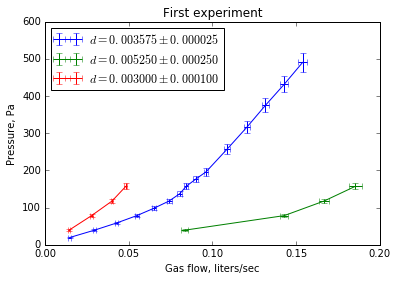

In [4]:
plt.title("First experiment")
plt.xlabel("Gas flow, liters/sec")
plt.ylabel("Pressure, Pa")

for e in ["step_1", "step_3_1", "step_3_2"]:
    plt.errorbar(x = data[e].Q, y = data[e].P, xerr = data[e].Error_Q, yerr = data[e].Error_P,
                 label = "$d = %f \pm %f$" % (work[e].Value["d"], work[e].Error["d"]))

plt.legend(loc = "best")